In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import sys
import os

In [70]:
# Đường dẫn tuyệt đối tới thư mục informer
informer_path = os.path.abspath('Informer2020')

# Thêm informer_path vào sys.path nếu chưa có
if informer_path not in sys.path:
    sys.path.append(informer_path)

In [71]:
from models.model import Informer

In [72]:
df = pd.read_csv('./weather.csv', sep=';', engine='python')
df

,"(airport)""",T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13
0,13.05.2025 13:30,31.0,755.9,756.9,52.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,20.0,NaN
1,13.05.2025 13:00,31.0,756.7,757.7,52.0,Wind blowing from the east,4,NaN,NaN,NaN,Few clouds (10-30%) 1440 m,10.0 and more,20.0,NaN
2,13.05.2025 12:30,30.0,757.2,758.2,55.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,20.0,NaN
3,13.05.2025 12:00,30.0,757.2,758.2,49.0,Wind blowing from the south-east,4,NaN,NaN,NaN,No Significant Clouds,10.0 and more,18.0,NaN
4,13.05.2025 11:30,30.0,757.2,758.2,49.0,Wind blowing from the east-southeast,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,13.05.2024 03:00,24.0,757.2,758.2,94.0,Wind blowing from the west,5,NaN,Light rain,NaN,"Few clouds (10-30%) 150 m, broken clouds (60-9...",10.0 and more,23.0,NaN
17380,13.05.2024 02:30,23.0,757.2,758.2,100.0,Wind blowing from the north-northwest,2,NaN,Light rain,NaN,"Few clouds (10-30%) 630 m, scattered clouds (4...",10.0 and more,23.0,NaN
17381,13.05.2024 02:00,23.0,757.2,758.2,94.0,Wind blowing from the west-northwest,3,NaN,Rain,NaN,"Few clouds (10-30%) 810 m, cumulus congestus o...",9.0,22.0,NaN
17382,13.05.2024 00:30,23.0,758.6,759.7,94.0,Wind blowing from the north-northwest,4,NaN,"Thunderstorm, rain",NaN,"Scattered clouds (40-50%) 600 m, few clouds (1...",5.0,22.0,NaN


In [73]:
df.dtypes


(airport)"      object
T              float64
P0             float64
P              float64
U              float64
DD              object
Ff               int64
ff10           float64
WW              object
W'W'           float64
c               object
VV              object
Td             float64
Unnamed: 13    float64
dtype: object

In [74]:
# Đếm số lượng giá trị không rỗng trong mỗi cột
print('Thống kê số dữ liệu:')
print(df.count())

Thống kê số dữ liệu:
(airport)"     17384
T              17383
P0             17383
P              17384
U              17383
DD             17384
Ff             17384
ff10              39
WW              4425
W'W'               0
c              17384
VV             17381
Td             17383
Unnamed: 13        0
dtype: int64


In [75]:
# Xóa cột ff10, Unnamed: 13, cột W'W', cột WW, cột DD, cột c
df = df.drop(columns=["Unnamed: 13","W'W'","ff10","WW","DD","c"])

In [76]:
df

,"(airport)""",T,P0,P,U,Ff,VV,Td
0,13.05.2025 13:30,31.0,755.9,756.9,52.0,3,10.0 and more,20.0
1,13.05.2025 13:00,31.0,756.7,757.7,52.0,4,10.0 and more,20.0
2,13.05.2025 12:30,30.0,757.2,758.2,55.0,3,10.0 and more,20.0
3,13.05.2025 12:00,30.0,757.2,758.2,49.0,4,10.0 and more,18.0
4,13.05.2025 11:30,30.0,757.2,758.2,49.0,3,10.0 and more,18.0
...,...,...,...,...,...,...,...,...
17379,13.05.2024 03:00,24.0,757.2,758.2,94.0,5,10.0 and more,23.0
17380,13.05.2024 02:30,23.0,757.2,758.2,100.0,2,10.0 and more,23.0
17381,13.05.2024 02:00,23.0,757.2,758.2,94.0,3,9.0,22.0
17382,13.05.2024 00:30,23.0,758.6,759.7,94.0,4,5.0,22.0


In [77]:
print('Danh sách cột dữ liệu trong data: ')
df.columns.values

Danh sách cột dữ liệu trong data: 


array(['(airport)"', 'T', 'P0', 'P', 'U', 'Ff', 'VV', 'Td'], dtype=object)

In [78]:
# Đảm bảo cột là kiểu chuỗi datetime
df['(airport)"'] = pd.to_datetime(df['(airport)"'], dayfirst=True, errors='coerce')


In [79]:
# Chuyển đổi kiểu dữ liệu và nội suy các giá trị thiếu
cols = ['T', 'P0', 'P', 'U', 'Ff', 'VV', 'Td']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[cols] = df[cols].interpolate().bfill().ffill()


In [80]:
df

,"(airport)""",T,P0,P,U,Ff,VV,Td
0,2025-05-13 13:30:00,31.0,755.9,756.9,52.0,3,9.000000,20.0
1,2025-05-13 13:00:00,31.0,756.7,757.7,52.0,4,9.000000,20.0
2,2025-05-13 12:30:00,30.0,757.2,758.2,55.0,3,9.000000,20.0
3,2025-05-13 12:00:00,30.0,757.2,758.2,49.0,4,9.000000,18.0
4,2025-05-13 11:30:00,30.0,757.2,758.2,49.0,3,9.000000,18.0
...,...,...,...,...,...,...,...,...
17379,2024-05-13 03:00:00,24.0,757.2,758.2,94.0,5,8.333333,23.0
17380,2024-05-13 02:30:00,23.0,757.2,758.2,100.0,2,8.666667,23.0
17381,2024-05-13 02:00:00,23.0,757.2,758.2,94.0,3,9.000000,22.0
17382,2024-05-13 00:30:00,23.0,758.6,759.7,94.0,4,5.000000,22.0


In [81]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])


 Biến mục tiêu: T 


g:\python\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


MAE: 0.04529171384885654
RMSE: 0.07920942363764863


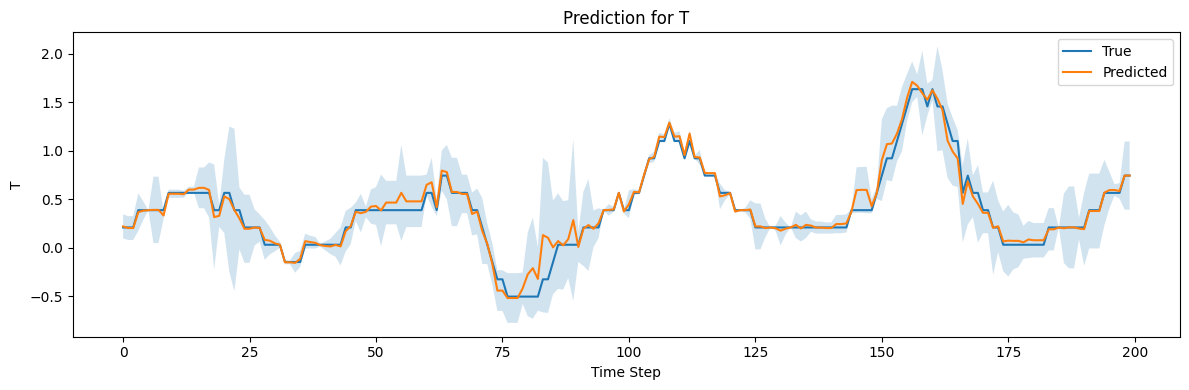

In [82]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Số mẫu dùng
N = 1000
subset_df = df.iloc[:N].copy()

# Các biến mục tiêu
target_cols = ['T']
input_cols = [col for col in cols if col not in target_cols]

# Dữ liệu đầu vào và đầu ra
X = subset_df[input_cols]
y = subset_df[target_cols]

# Chuẩn hóa dữ liệu
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# Chia train/test (không shuffle do dữ liệu thời gian)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)

# Dự báo từng biến mục tiêu riêng biệt
for i, target in enumerate(target_cols):
    print(f"\n Biến mục tiêu: {target} ")
    
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_train, y_train[:, i])

    # Dự đoán
    y_pred_scaled, sigma = gpr.predict(X_test, return_std=True)

    # Đưa về giá trị ban đầu
    y_pred = y_scaler.inverse_transform(np.column_stack([
        y_test[:, j] if j != i else y_pred_scaled for j in range(y.shape[1])
    ]))[:, i]
    y_true = y_scaler.inverse_transform(y_test)[:, i]

    # Đánh giá
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

    plt.figure(figsize=(12, 4))
    plt.plot(y_true, label="True")
    plt.plot(y_pred, label="Predicted")
    plt.fill_between(np.arange(len(y_pred)), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2)
    plt.title(f'Prediction for {target}')
    plt.xlabel('Time Step')
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()



### Chuẩn bị đặc trưng

In [83]:
# Giả sử df đã có cột '(airport)"' với dạng string như "12.05.2025 12:30"
df['(airport)"'] = pd.to_datetime(df['(airport)"'], format='%d.%m.%Y %H:%M')

# Tạo các feature thời gian
df['hour'] = df['(airport)"'].dt.hour
df['weekday'] = df['(airport)"'].dt.weekday
df['day'] = df['(airport)"'].dt.day
df['month'] = df['(airport)"'].dt.month

# Chọn các feature thời gian để dùng
time_features = ['hour', 'weekday', 'day', 'month']

# Tạo mảng numpy chứa các feature thời gian
time_feature_array = df[time_features].values


In [84]:
def create_sequences(data, seq_len, label_len, pred_len):
    X, Y = [], []
    for i in range(len(data) - seq_len - pred_len):
        seq_x = data[i:i+seq_len]
        seq_y = data[i+seq_len:i+seq_len+pred_len]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)

def create_time_sequences(data, seq_len, label_len, pred_len):
    X_mark_enc, X_mark_dec = [], []
    total_len = seq_len + pred_len
    for i in range(len(data) - total_len):
        enc = data[i:i+seq_len]
        dec = data[i+seq_len-label_len:i+seq_len+pred_len]
        X_mark_enc.append(enc)
        X_mark_dec.append(dec)
    return np.array(X_mark_enc), np.array(X_mark_dec)


In [85]:
SEQ_LEN = 96
LABEL_LEN = 48
PRED_LEN = 24

# Giả sử bạn đã có df[cols] chứa các cột input chính (kiểu số)
X, y = create_sequences(df[cols].values, SEQ_LEN, LABEL_LEN, PRED_LEN)

# Feature thời gian tạo ở bước 1
x_mark_enc, x_mark_dec = create_time_sequences(time_feature_array, SEQ_LEN, LABEL_LEN, PRED_LEN)


In [86]:
import torch
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, x_mark_enc, x_mark_dec):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.x_mark_enc = torch.tensor(x_mark_enc, dtype=torch.float32)
        self.x_mark_dec = torch.tensor(x_mark_dec, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.x_mark_enc[idx], self.x_mark_dec[idx]


In [87]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_loader = DataLoader(TimeSeriesDataset(X, y, x_mark_enc, x_mark_dec), batch_size=BATCH_SIZE, shuffle=True)


In [88]:
x_mark_enc, x_mark_dec = create_time_sequences(time_feature_array, SEQ_LEN, LABEL_LEN, PRED_LEN)


In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Informer(
    enc_in=len(cols),     
    dec_in=len(cols),     
    c_out=len(cols),
    seq_len=SEQ_LEN,
    label_len=LABEL_LEN,
    out_len=PRED_LEN,
    factor=5,
    d_model=512,
    n_heads=8,
    e_layers=2,
    d_layers=1,
    dropout=0.05,
    attn='prob',
    embed='timeF',
    freq='h'
).to(device)


In [ ]:
# Đảm bảo bạn đã import trước đó
from torch import nn, optim

model.train()

# Định nghĩa hàm mất mát và optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    for batch_x, batch_y, batch_x_mark_enc, batch_x_mark_dec in train_loader:
        # Đưa dữ liệu lên thiết bị
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        batch_x_mark_enc = batch_x_mark_enc.to(device)
        batch_x_mark_dec = batch_x_mark_dec.to(device)

        # Tạo đầu vào cho decoder
        dec_inp = torch.zeros([batch_y.shape[0], LABEL_LEN + PRED_LEN, batch_y.shape[2]]).to(device)
        dec_inp[:, :LABEL_LEN, :] = batch_x[:, -LABEL_LEN:, :]

        # Forward
        optimizer.zero_grad()
        output = model(batch_x, batch_x_mark_enc, dec_inp, batch_x_mark_dec)

        # Tính loss và backpropagation
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss / len(train_loader):.4f}")


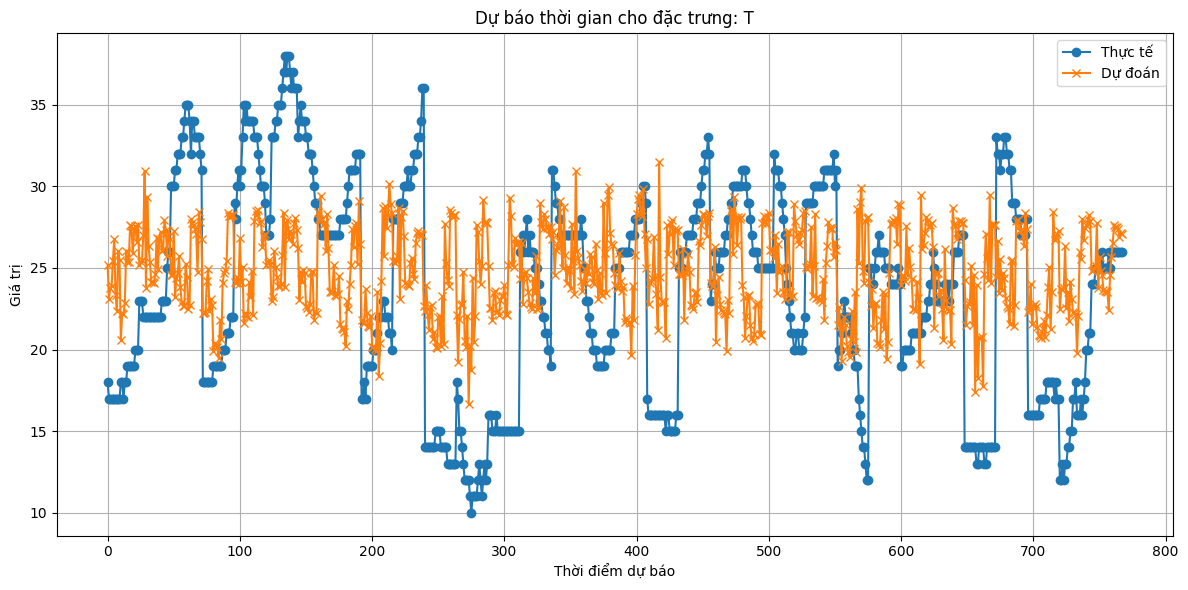

In [ ]:
feature_name = 'T'  

# Tìm chỉ số của cột đó
feature_idx = cols.index(feature_name)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(true_np[:, feature_idx], label='Thực tế', marker='o')
plt.plot(pred_np[:, feature_idx], label='Dự đoán', marker='x')
plt.title(f'Dự báo thời gian cho đặc trưng: {feature_name}')
plt.xlabel('Thời điểm dự báo')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
feature_name = 'U'  

# Tìm chỉ số của cột đó
feature_idx = cols.index(feature_name)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(true_np[:, feature_idx], label='Thực tế', marker='o')
plt.plot(pred_np[:, feature_idx], label='Dự đoán', marker='x')
plt.title(f'Dự báo thời gian cho đặc trưng: {feature_name}')
plt.xlabel('Thời điểm dự báo')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'true_np' is not defined

<Figure size 1200x600 with 0 Axes>